In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
def plot_lorenz_curve(fare_share_in,income_share_in):
    cum_fare_share = np.cumsum(fare_share_in)
    cum_fare_share = np.insert(cum_fare_share,0,0)
    cum_income_share = np.cumsum(income_share_in)
    cum_income_share = np.insert(cum_income_share,0,0)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(cum_income_share*100,cum_fare_share*100)
    ax.plot(np.arange(0,1.1,0.1)*100,np.arange(0,1.1,0.1)*100,color = 'red')
    plt.axis([0,100,0,100])
    plt.xlabel('Accumulated % of total income')
    plt.ylabel('Accumulated % of total fare')
    fig.savefig('lorenz_curve.pdf')

In [4]:
def cal_suits_index(fare_share_in,income_share_in):
    cum_fare_share = np.cumsum(fare_share_in)
    cum_fare_share = np.insert(cum_fare_share,0,0)
    cum_income_share = np.cumsum(income_share_in)
    cum_income_share = np.insert(cum_income_share,0,0)
    suits_index = 0
    for i in range(1,cum_fare_share.shape[0]):
        suits_index = suits_index + 0.5*(cum_fare_share[i]+cum_fare_share[i-1])*(cum_income_share[i]-cum_income_share[i-1])
    return 2*(1/2-suits_index)

-0.4012268183433907


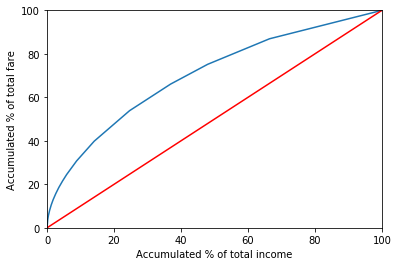

In [6]:
df = pd.read_csv('./Data/suits_index.csv')
income_share = df['share of income'].values
fare_share = df['share of fare'].values
plot_lorenz_curve(fare_share,income_share)
print(cal_suits_index(fare_share,income_share))